In [1]:
from PIL import Image
import numpy as np
from skimage.measure import regionprops
import matplotlib.pyplot as plt

from hedgiefinder import HedgieFinder
from hedgiefinder.inference import alpha_mask

In [2]:
%%timeit
pizza = Image.open('../center_of_mass/overlays/pizza.png')
pizza

143 µs ± 3.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


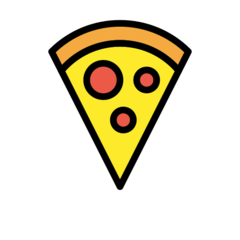

In [3]:
pizza = Image.open('../center_of_mass/overlays/pizza.png')
pizza

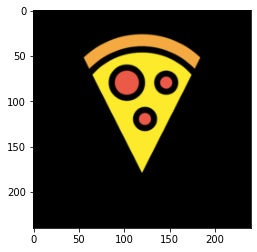

In [4]:
pz_array = np.array(pizza.convert('RGB'))
plt.imshow(pz_array)

In [5]:
from scipy.ndimage.interpolation import zoom

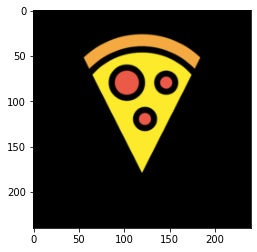

In [6]:
plt.imshow(pz_array)

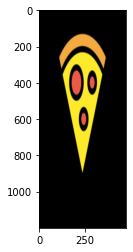

In [7]:
plt.imshow(zoom(pz_array, (5,2,1)))

In [8]:
video = "../data/videos/test/20200809231857123.mp4"

In [9]:
hf = HedgieFinder(video, fps=1).predict()

Loading Video...


In [10]:
originals = hf.originals
preds = hf.predictions

originals.shape, preds.shape

((57, 1088, 1920, 3), (57, 1088, 1920))

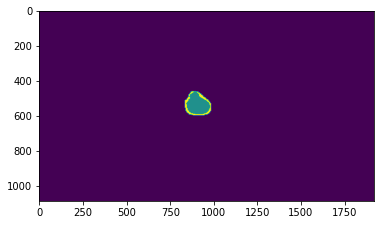

In [11]:
plt.imshow(preds[0])

In [12]:
alpha_gen = (alpha_mask(o, p) for o, p, in  zip(originals, preds))

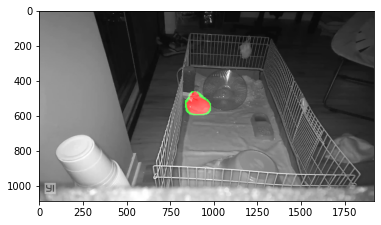

In [13]:
plt.imshow(next(alpha_gen))

In [14]:
def get_center(mask):
    if mask.sum() > 0:
        props = regionprops(mask)
        center =  props[0].centroid
    else:
        center = (-1, -1)
    return center

In [15]:
get_center(preds[0])

(534.9074543610548, 908.6224645030426)

In [16]:
from copy import copy
def add_overlay(img, overlay, x, y):
    new_img = np.copy(img)
    x, y = int(x), int(y)
    xsize, ysize = img.shape[:-1]
    sz = overlay.shape
    xc, yc = xsize//2, ysize//2
    mask = np.zeros(img.shape)
    if x > 0 and y > 0: 
        mask[x-sz[0]//2:x+sz[0]//2, y-sz[1]//2:y+sz[1]//2, :] = overlay
        new_img[mask>0] = mask[mask>0]
    return new_img

def insert_image(img, fname, x, y, sz=(200, 200)):
    overlay_array = np.array(Image.open(fname).convert('RGB'))
    z_factors = np.array((*sz, 3))/np.array(overlay_array.shape)
    return add_overlay(img, zoom(overlay_array, z_factors), x, y)

def insert_pizza(img, x, y, sz=(200, 200)):
    pizza = '../center_of_mass/overlays/pizza.png'
    return insert_image(img, pizza, x, y, sz=sz)

def download(url, fname='temp.png'):
    urllib.request.urlretrieve(url, fname)
    return fname

In [17]:
pizza_gen = (insert_pizza(o, *get_center(p), sz = (100, 200)) for o,p in zip(originals, preds))

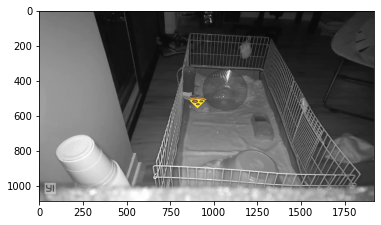

In [18]:
plt.imshow(next(pizza_gen))

For more emojis: https://getemoji.com/

In [19]:
import urllib
import tempfile
star_url = 'https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/240/openmoji/272/sparkles_2728.png'
star_file = 'star.png'


star_file = download(star_url, star_file)
star_file

'star.png'

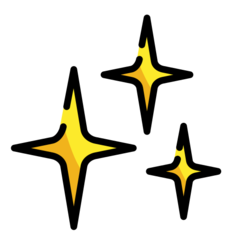

In [20]:
Image.open(star_file)

In [21]:
star_gen = (insert_image(o, star_file, *get_center(p), sz = (100, 200)) for o,p in zip(originals, preds))

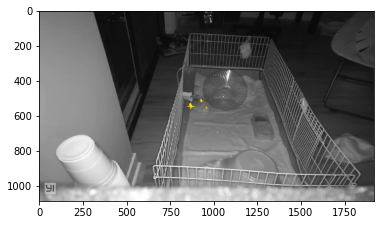

In [22]:
plt.imshow(next(star_gen))

In [29]:
from hedgiefinder.video import array_to_video, array_to_gif

In [24]:
pizza_gen = (insert_pizza(o, *get_center(p), sz = (100, 200)) for o,p in zip(originals, preds))

In [25]:
array_to_video(pizza_gen, 'pizza_hog.mp4')

C:\Users\bnel1\AppData\Local\Temp\tmpkig0dk6c\%06d.jpg


'pizza_hog.mp4'

In [33]:
star_gen = (insert_image(o, star_file, *get_center(p), sz = (100, 200)) for o,p in zip(originals, preds))
array_to_gif(star_gen, 'star_hog.gif')

C:\Users\bnel1\AppData\Local\Temp\tmp00grk4r4\%06d.jpg


'star_hog.gif'

C:\Users\bnel1\AppData\Local\Temp\tmpcewt37de\%06d.jpg


'star_hog.gif'

In [ ]:
ar